<a href="https://colab.research.google.com/github/Keishin315/Keishin315/blob/main/%E3%83%8D%E3%83%83%E3%83%88%E3%81%8B%E3%82%89%E6%8B%BE%E3%81%A3%E3%81%A6%E3%81%8D%E3%81%9FLSTM%E3%82%B3%E3%83%BC%E3%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler

In [18]:
df = pd.read_csv('nikkei.csv')
L = len(df)
Y = df.iloc[:, 4]  # 終値の列のみ抽出する。
Y = np.array(Y)  # numpy配列に変換する。
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。


In [19]:




scaler = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。

scaler1 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。



In [11]:
print(X,Y)

[[22250.25 22269.88 21810.52]
 [22269.88 21810.52 21846.48]
 [21810.52 21846.48 21803.62]
 [21846.48 21803.62 21680.34]
 [21803.62 21680.34 21821.16]
 [21680.34 21821.16 21583.12]
 [21821.16 21583.12 21507.54]
 [21583.12 21507.54 21646.55]
 [21507.54 21646.55 21812.  ]
 [21646.55 21812.   21952.4 ]
 [21812.   21952.4  22177.02]
 [21952.4  22177.02 22262.6 ]
 [22177.02 22262.6  22351.06]
 [22262.6  22351.06 22574.76]
 [22351.06 22574.76 22036.05]
 [22574.76 22036.05 21919.33]
 [22036.05 21919.33 21501.62]
 [21919.33 21501.62 21678.68]
 [21501.62 21678.68 21219.5 ]
 [21678.68 21219.5  21148.02]
 [21219.5  21148.02 21602.75]
 [21148.02 21602.75 21816.19]
 [21602.75 21816.19 21374.83]
 [21816.19 21374.83 21506.88]
 [21374.83 21506.88 21115.45]
 [21506.88 21115.45 20987.92]
 [21115.45 20987.92 20392.58]
 [20987.92 20392.58 20166.19]
 [20392.58 20166.19 19155.74]
 [20166.19 19155.74 19327.06]
 [19155.74 19327.06 20077.62]
 [19327.06 20077.62 20014.77]
 [20077.62 20014.77 19561.96]
 [20014.77

In [25]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。<--
print(X.shape)
# train, testデータを定義
X_train = X[:190, :, :]
X_test = X[190:, :, :]
Y_train = Y[:190, :]
Y_test = Y[190:, :]


(237, 1, 3)


In [22]:
print(X)

[[0.7460102  0.74597684 0.62669937]
 [0.75074251 0.63593942 0.63518825]
 [0.64000212 0.64455346 0.62507052]
 [0.64867119 0.63428656 0.59596849]
 [0.6383387  0.60475545 0.6292111 ]
 [0.60861893 0.63848818 0.5730183 ]
 [0.64256716 0.58146688 0.55517654]
 [0.58518158 0.56336206 0.58799187]
 [0.5669611  0.59666122 0.62704874]
 [0.60047299 0.63629395 0.6601922 ]
 [0.64035891 0.66992608 0.71321702]
 [0.6742059  0.72373269 0.73341942]
 [0.72835625 0.74423295 0.75430169]
 [0.74898748 0.76542311 0.80710932]
 [0.77031301 0.81900934 0.679939  ]
 [0.82424158 0.68996402 0.65238555]
 [0.69437185 0.66200432 0.55377904]
 [0.66623353 0.56194396 0.59557662]
 [0.56553393 0.6043578  0.48718052]
 [0.60821874 0.4943635  0.47030662]
 [0.49752175 0.47724082 0.57765224]
 [0.48028968 0.58616915 0.62803786]
 [0.58991389 0.63729764 0.52384842]
 [0.64136902 0.53157204 0.55502074]
 [0.53496799 0.56320396 0.462618  ]
 [0.56680199 0.46943884 0.43251269]
 [0.47243785 0.43888966 0.29197404]
 [0.44169351 0.29627891 0.23

In [24]:
model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train, Y_train, epochs=100, verbose=2)
Predict = model.predict(X_test)

# オリジナルのスケールに戻す、タイムインデックスを付ける

TypeError: ignored

In [15]:
print(Predict)

                       0
日付                      
2019-08-30  20513.111328
2019-09-02  20611.021484
2019-09-03  20639.812500
2019-09-04  20666.126953
2019-09-05  20661.046875
2019-09-06  20850.324219
2019-09-09  21029.892578
2019-09-10  21204.804688
2019-09-11  21296.185547
2019-09-12  21434.648438
2019-09-13  21586.070312
2019-09-17  21783.517578
2019-09-18  21895.501953
2019-09-19  21927.941406
2019-09-20  21956.667969
2019-09-24  21991.033203
2019-09-25  22028.503906
2019-09-26  22005.148438
2019-09-27  21997.248047
2019-09-30  21911.128906
2019-10-01  21805.951172
2019-10-02  21793.173828
2019-10-03  21759.488281
2019-10-04  21550.281250
2019-10-07  21427.216797
2019-10-08  21345.253906
2019-10-09  21443.865234
2019-10-10  21442.552734
2019-10-11  21488.630859
2019-10-15  21603.007812
2019-10-16  21885.935547
2019-10-17  22190.972656
2019-10-18  22353.726562
2019-10-21  22421.177734
2019-10-23  22456.556641
2019-10-24  22519.240234
2019-10-25  22614.666016
2019-10-28  22694.537109


In [6]:
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(df.iloc[3:193,0])

Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(df.iloc[193:,0])

Predict = scaler1.inverse_transform(Predict)
Predict = pd.DataFrame(Predict)
Predict.index=pd.to_datetime(df.iloc[193:,0])

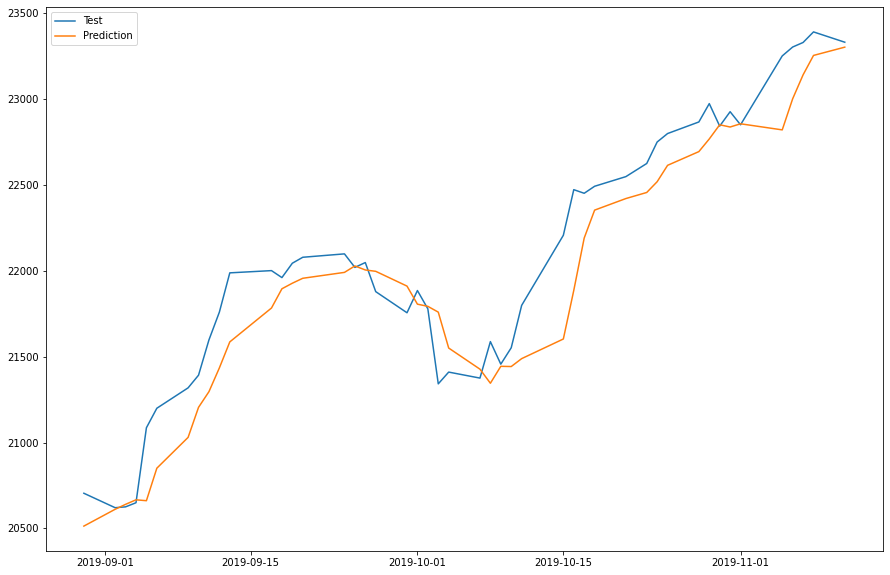

In [7]:
plt.figure(figsize=(15,10))
plt.plot(Y_test, label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()